In [1]:
import pandas as pd

# MACRO (brasil inteiro)

In [41]:
macro = pd.read_csv("data/brazil_covid19_macro.csv")

In [42]:
macro = (
    macro
    .assign(
        date = lambda df: pd.to_datetime(df['date'])
    )
)

In [43]:
macro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        456 non-null    datetime64[ns]
 1   country     456 non-null    object        
 2   week        456 non-null    int64         
 3   cases       456 non-null    float64       
 4   deaths      456 non-null    int64         
 5   recovered   401 non-null    float64       
 6   monitoring  401 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 25.1+ KB


In [5]:
macro = macro.set_index('date')

<Axes: xlabel='date'>

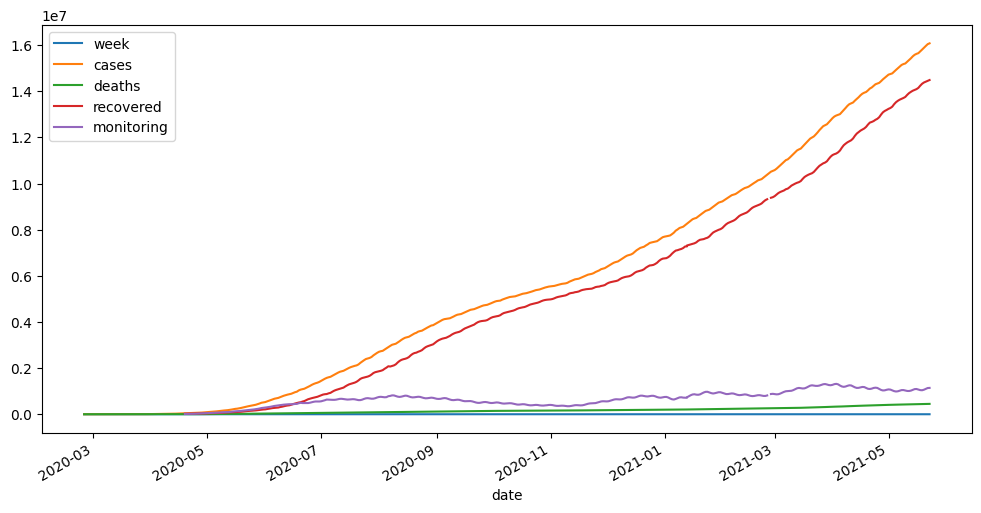

In [6]:
macro.plot(figsize=(12,6))

# Grafico (Casos/Mortes)

<Axes: xlabel='date'>

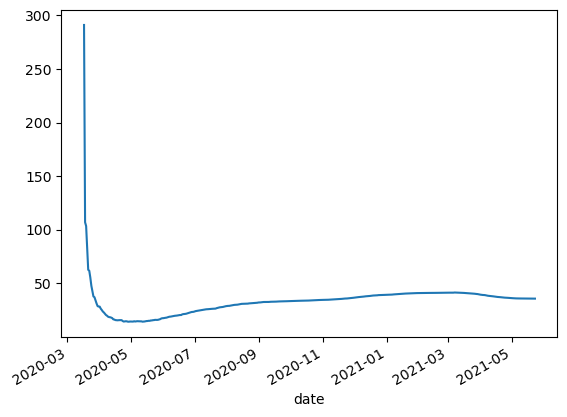

In [50]:

macro_diferente_zero = macro[macro['deaths'] != 0].copy()
macro_diferente_zero['casos_por_mortes'] = macro_diferente_zero['cases'] / macro_diferente_zero['deaths']
macro_diferente_zero.set_index('date', inplace=True)
macro_diferente_zero['casos_por_mortes'].plot()


# Taxa de mortalidade atraves do tempo

In [ ]:
# criar nova coluna mortes/casos*100

# Novos casos por dia atraves do tempo

In [ ]:
#joao

# MICRO (cidades)

In [7]:
cidades = pd.read_csv("data/brazil_covid19_cities.csv")

In [8]:
cidades = (
    cidades
    .assign(
        date = lambda df: pd.to_datetime(df['date'])
    )
)

In [9]:
cidades = cidades.set_index("date")

In [11]:
cidades.groupby("name").agg({"deaths": "max"}).sort_values("deaths", ascending=False).head(10)

,deaths
name,
São Paulo,29866
Rio de Janeiro,25924
Manaus,8950
Brasília,8466
Fortaleza,8302
Salvador,6409
Curitiba,5033
Belo Horizonte,4894
Goiânia,4754


# por cidades em cada região

<Axes: xlabel='date'>

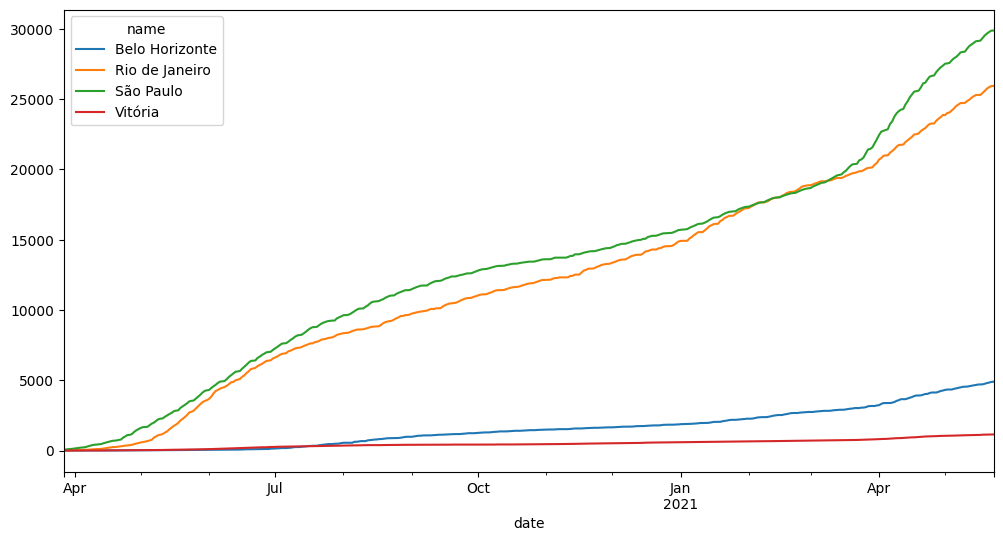

In [12]:
# sudeste

(
    cidades
    .loc[lambda df: (df['name'] == 'Vitória') & (df['state'] == 'ES') | (df['name'] == 'Rio de Janeiro') & (df['state'] == 'RJ') | (df['name'] =='São Paulo') & (df['state'] == 'SP') | (df['name'] == 'Belo Horizonte') & (df['state'] == 'MG')]
    .pivot(columns="name", values="deaths")
).plot(figsize=(12,6))

<Axes: xlabel='date'>

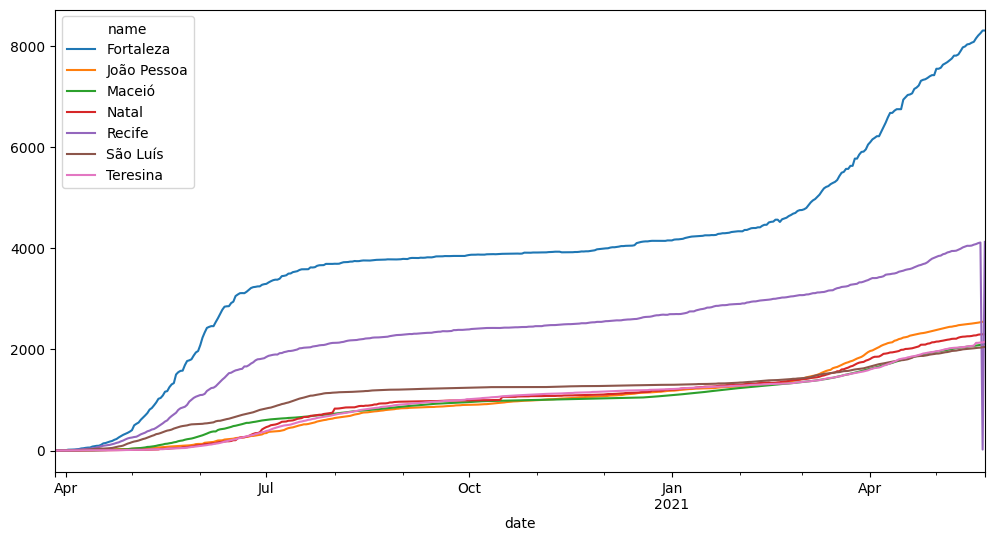

In [11]:
# nordeste
# → Região Nordeste: Aracaju (Sergipe), 
# Fortaleza (Ceará), João Pessoa (Paraíba), 
# Maceió (Alagoas), Natal (Rio Grande do Norte), 
# Recife (Pernambuco), Salvador (Bahia), São Luís (Maranhão) e 
# Teresina (Piauí).


(
    cidades
    .loc[lambda df: 
    (df['name'] == 'Fortaleza') & (df['state'] == 'CE') | 
    (df['name'] == 'João Pessoa') & (df['state'] == 'PB') | 
    (df['name'] =='Maceió') & (df['state'] == 'AL') | 
    (df['name'] == 'Natal') & (df['state'] == 'RN') | 
    (df['name'] == 'Recife') & (df['state'] == 'PE') | 
    (df['name'] == 'Salvador') & (df['state'] == 'BH') | 
    (df['name'] == 'São Luís') & (df['state'] == 'MA')  | 
    (df['name']== 'Teresina') & (df['state'] == 'PI')]
    .pivot(columns="name", values="deaths")
) .plot(figsize=(12,6))

<Axes: title={'center': 'Norte'}, xlabel='date'>

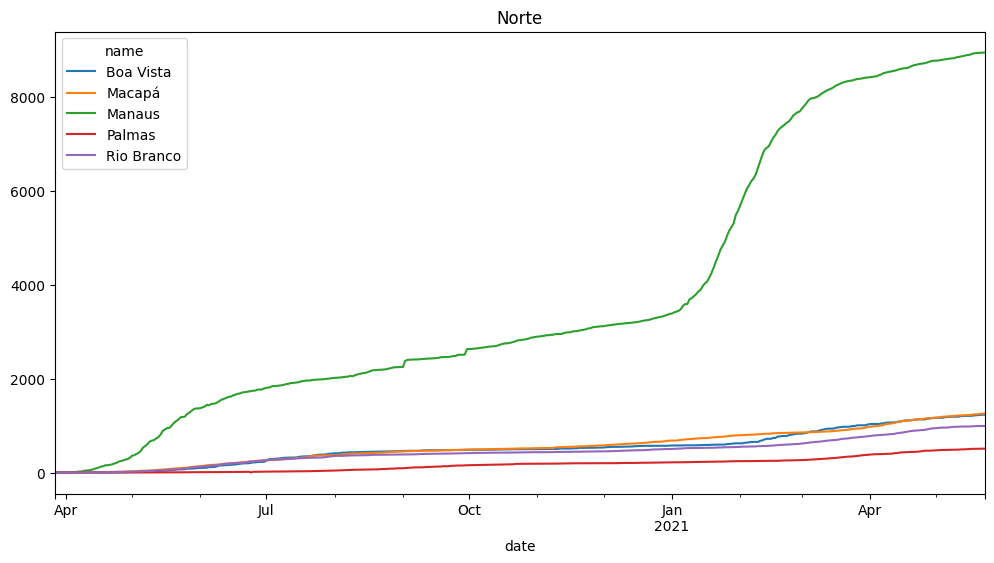

In [13]:
# norte
# → Região Norte: Belém (Pará), 
# Boa Vista (Roraima) Macapá (Amapá), 
# Manaus (Amazonas), Palmas (Tocantins), 
# Porto Velho (Rondônia) e Rio Branco (Acre).
(
    cidades
    .loc[lambda df: 
    (df['name'] == 'Belém') & (df['state'] == 'PR') | 
    (df['name'] == 'Boa Vista') & (df['state'] == 'RR') | 
    (df['name'] =='Macapá') & (df['state'] == 'AP') | 
    (df['name'] == 'Manaus') & (df['state'] == 'AM') | 
    (df['name'] == 'Palmas') & (df['state'] == 'TO') | 
    (df['name'] == 'Rio Branco') & (df['state'] == 'AC')]
    .pivot(columns="name", values="deaths")
) .plot(figsize=(12,6), title='Norte')

In [14]:
# sul
# → Região Sul: Curitiba (Paraná), 
# Florianópolis (Santa Catarina) e Porto Alegre (Rio Grande do Sul).


(
    cidades
    .loc[lambda df: (df['name'] == '')]
)

,state,name,code,cases,deaths
date,,,,,


<Axes: title={'center': 'Centro-Oeste'}, xlabel='date'>

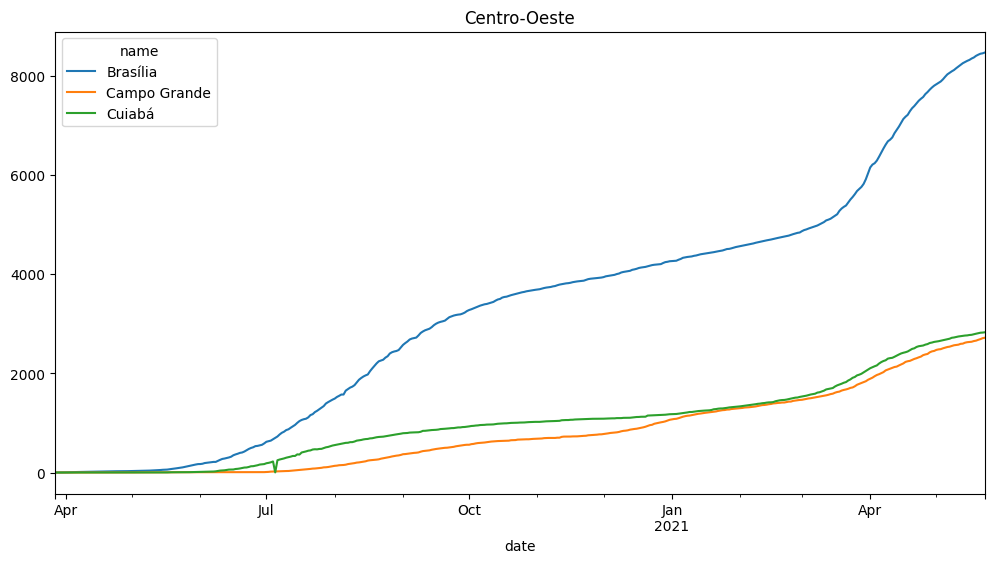

In [19]:
# centro-oeste
# → Região Centro-Oeste: Brasília (Capital do País e sede do governo do Distrito Federal), 
# Campo Grande (Mato Grosso do Sul), Cuiabá (Mato Grosso

(
    cidades
    .loc[lambda df: (df['name'] == 'Brasília') & (df['state'] == 'DF') |
         (df['name'] == 'Campo Grande') & (df['state'] == 'MS') |
            (df['name'] == 'Cuiabá') & (df['state'] == 'MT')]
    .pivot(columns="name", values="deaths")
    .plot(figsize=(12,6), title='Centro-Oeste')
)   

# normalizar pela populacao

In [21]:
populacao = pd.read_csv("data/brazil_population_2019.csv")

In [22]:
cidades = cidades.reset_index()

In [23]:
cidades_populacao = cidades.merge(populacao, left_on="code", right_on='city_code')

In [24]:
cidades_populacao = cidades_populacao.assign(
    deaths_per_100k = lambda df: df['deaths'] / df['population'] * 100000,
    cases_per_100k = lambda df: df['cases'] / df['population'] * 100000
)

In [25]:
cidades_populacao

,date,state_x,name,code,cases,deaths,region,state_y,city,state_code,city_code,health_region_code,health_region,population,deaths_per_100k,cases_per_100k
0,2020-03-27,AC,Acrelândia,120001.0,0.0,0,Norte,Acre,Acrelândia,12,120001,12002,Baixo Acre e Purus,15256.0,0.000000,0.000000
1,2020-03-27,AC,Assis Brasil,120005.0,0.0,0,Norte,Acre,Assis Brasil,12,120005,12001,Alto Acre,7417.0,0.000000,0.000000
2,2020-03-27,AC,Brasiléia,120010.0,0.0,0,Norte,Acre,Brasiléia,12,120010,12001,Alto Acre,26278.0,0.000000,0.000000
3,2020-03-27,AC,Bujari,120013.0,0.0,0,Norte,Acre,Bujari,12,120013,12002,Baixo Acre e Purus,10266.0,0.000000,0.000000
4,2020-03-27,AC,Capixaba,120017.0,0.0,0,Norte,Acre,Capixaba,12,120017,12002,Baixo Acre e Purus,11733.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211467,2021-05-23,TO,Sítio Novo do Tocantins,172080.0,604.0,8,Norte,Tocantins,Sítio Novo do Tocantins,17,172080,17002,Bico do Papagaio,9029.0,88.603389,6689.555876
1211468,2021-05-23,TO,Palmas,172100.0,41090.0,509,Norte,Tocantins,Palmas,17,172100,17006,Capim Dourado,299127.0,170.161838,13736.640290
1211469,2021-05-23,TO,Tocantinópolis,172120.0,1968.0,41,Norte,Tocantins,Tocantinópolis,17,172120,17002,Bico do Papagaio,22870.0,179.274158,8605.159598
1211470,2021-05-23,TO,Wanderlândia,172208.0,772.0,11,Norte,Tocantins,Wanderlândia,17,172208,17001,Médio Norte Araguaia,11683.0,94.153899,6607.891809


# Grafico das regioes com os dados normalizados por populacao (mortes a cada 100 habitantes | casos a cada 100 habitantes )

<Axes: xlabel='cases_per_100k', ylabel='deaths_per_100k'>

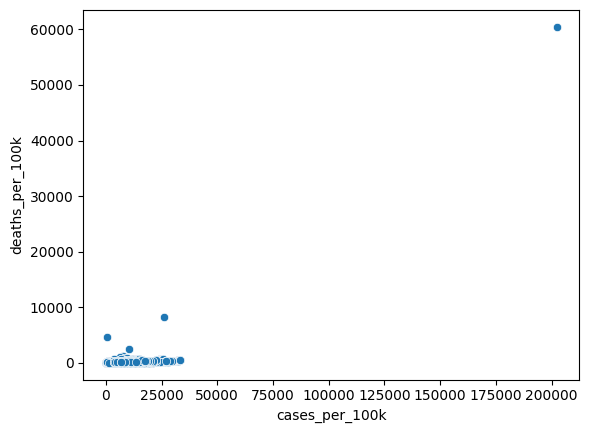

In [26]:
import seaborn as sns

sns.scatterplot(data=cidades_populacao, x="cases_per_100k", y="deaths_per_100k")

In [ ]:
import seaborn as sns

sns.scatterplot(data=cidades_populacao, x="cases_per_100k", y="deaths_per_100k")